In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_file = 'airbnb-listings.csv'
cleaned_file = 'airbnb-listings_cleaned.csv'
df = pd.read_csv(raw_file, delimiter=";", low_memory=False)

# Filtrar resultados de Madrid

In [3]:
madrid_condition = df['State'].astype(str).str.contains('Madrid')
df = df[madrid_condition]

# Limpieza de columnas

In [4]:
columns_to_keep = ['ID', 'Host ID', 'Host Since', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude', \
                   'Amenities', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Square Feet', 'Cleaning Fee', \
                   'Availability 365', 'Review Scores Location', 'Cancellation Policy', 'Accommodates', 'Reviews per Month', 'Minimum Nights', 'Price', 'Monthly Price', 'Weekly Price']
df = df[columns_to_keep]

print(df.columns)

Index(['ID', 'Host ID', 'Host Since', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'City', 'State', 'Zipcode', 'Latitude',
       'Longitude', 'Amenities', 'Property Type', 'Room Type', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Square Feet', 'Cleaning Fee',
       'Availability 365', 'Review Scores Location', 'Cancellation Policy',
       'Accommodates', 'Reviews per Month', 'Minimum Nights', 'Price',
       'Monthly Price', 'Weekly Price'],
      dtype='object')


# Normalización del código postal

In [5]:
replace_values = {'nan': np.nan, '-': np.nan, '28': np.nan, '-' : np.nan, '2802\n28012' : '28012', '28002\n28002': '28002', '28051\n28051' : '28051', \
                  'Madrid 28004': '28004', '2815' : '28015', '2805' : '28005'}

df = df.replace({'Zipcode': replace_values})

# Conversión de las fechas de 'Host Since' en date

In [6]:
host_since = df['Host Since']
host_since = list(map(pd.to_datetime, host_since))
df['Host Since'] = host_since

# Limpio bien los nombres de los barrios: me quedo con los valores de 'Neighbourhood' excepto en el caso de los nulls que los sustituyo por el valor de 'Neighbourhood Cleansed'

In [7]:
df['Neighbourhood'] = df['Neighbourhood'].fillna(df['Neighbourhood Cleansed'])
df = df.drop('Neighbourhood Cleansed', axis = 1)

df['Neighbourhood'].isna().value_counts()

False    13198
Name: Neighbourhood, dtype: int64

# Property Type
## Agrupar los 'Property Type' por los que interesan u otros

<AxesSubplot:>

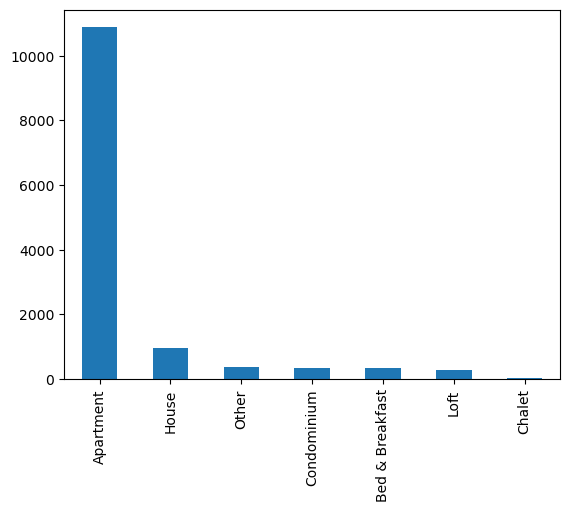

In [8]:
valid_property_types = ['House', 'Apartment', 'Bed & Breakfast', 'Condominium', 'Loft', 'Chalet', 'Hostal']

property_types = df['Property Type']
property_types = property_types.map(lambda value: value if value in valid_property_types else 'Other')
df['Property Type'] = property_types

df['Property Type'].value_counts().plot.bar()

# Amenities

<AxesSubplot:>

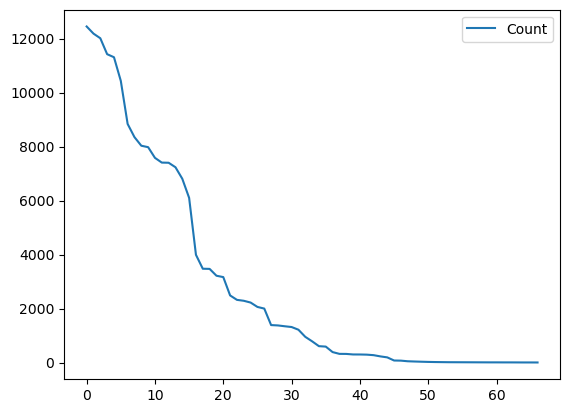

In [54]:
amenities_values = df['Amenities'].str.cat(sep=',').split(",")
amenities = {}
for amenitie in amenities_values:
    amenities[amenitie] = amenities.get(amenitie, 0) + 1
amenities = sorted(amenities.items(), key=lambda x: x[1], reverse=True)

pd.DataFrame.from_records(amenities, columns=['Name', 'Count']).plot()

In [55]:
amenities = map(lambda value: value[0], amenities)
amenities = list(amenities)#[:10]
amenities

['Wireless Internet',
 'Kitchen',
 'Heating',
 'Essentials',
 'Washer',
 'TV',
 'Hangers',
 'Shampoo',
 'Elevator in building',
 'Family/kid friendly',
 'Iron',
 'Internet',
 'Hair dryer',
 'Air conditioning',
 'Laptop friendly workspace',
 'Buzzer/wireless intercom',
 'translation missing: en.hosting_amenity_50',
 'Smoking allowed',
 'First aid kit',
 '24-hour check-in',
 'translation missing: en.hosting_amenity_49',
 'Doorman',
 'Pets allowed',
 'Dryer',
 'Fire extinguisher',
 'Breakfast',
 'Smoke detector',
 'Carbon monoxide detector',
 'Wheelchair accessible',
 'Safety card',
 'Cable TV',
 'Lock on bedroom door',
 'Free parking on premises',
 'Pets live on this property',
 'Pool',
 'Suitable for events',
 'Private entrance',
 'Hot tub',
 'Indoor fireplace',
 'Cat(s)',
 'Dog(s)',
 'Self Check-In',
 'Gym',
 'Private living room',
 'Doorman Entry',
 'Bathtub',
 'Lockbox',
 'Room-darkening shades',
 'Other pet(s)',
 'Crib',
 'Smartlock',
 'Pack ’n Play/travel crib',
 'Window guards',
 

In [56]:
amenities_df = df['Amenities'].fillna('')
valid_amenities = amenities

for index, row_amenities in enumerate(amenities_df):
    row_amenities = row_amenities.split(',')
    row_amenities = list(filter(lambda value: value in valid_amenities, row_amenities))

    df.loc[index, 'Amenities Count'] = len(row_amenities)

    for amenitie in row_amenities:
        if amenitie not in df.columns:
            df[amenitie] = False
        df.loc[index, amenitie] = True

df[np.append(np.array(valid_amenities), 'Amenities Count')]

,Wireless Internet,Kitchen,Heating,Essentials,Washer,TV,Hangers,Shampoo,Elevator in building,Family/kid friendly,...,Babysitter recommendations,Free parking on street,Outlet covers,Game console,Washer / Dryer,Stair gates,Paid parking off premises,Table corner guards,Changing table,Amenities Count
1021,True,True,True,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,12.0
1022,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,22.0
1023,True,True,True,True,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,19.0
1024,True,True,True,True,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,13.0
1025,True,False,True,True,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
41433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
41434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
41435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [57]:
amenities_df = pd.DataFrame()
for amenitie in valid_amenities:
    amenities_df[amenitie] = df.groupby(amenitie)['Price'].mean()

amenities_df.rename_axis('', inplace=True)
amenities_df

,Wireless Internet,Kitchen,Heating,Essentials,Washer,TV,Hangers,Shampoo,Elevator in building,Family/kid friendly,...,Keypad,Babysitter recommendations,Free parking on street,Outlet covers,Game console,Washer / Dryer,Stair gates,Paid parking off premises,Table corner guards,Changing table
,,,,,,,,,,,,,,,,,,,,,
False,65.676790,65.707457,65.737816,65.708303,65.735538,65.600881,65.713001,65.659086,65.616664,65.727021,...,65.733338,65.735365,65.733338,65.733338,65.73074,65.733338,65.733338,65.733338,65.733338,65.733338
True,66.563615,66.121212,65.665441,66.136010,65.697368,68.082386,66.140127,67.377193,68.349911,65.882463,...,NaN,39.000000,NaN,NaN,100.00000,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Amenities Count'>

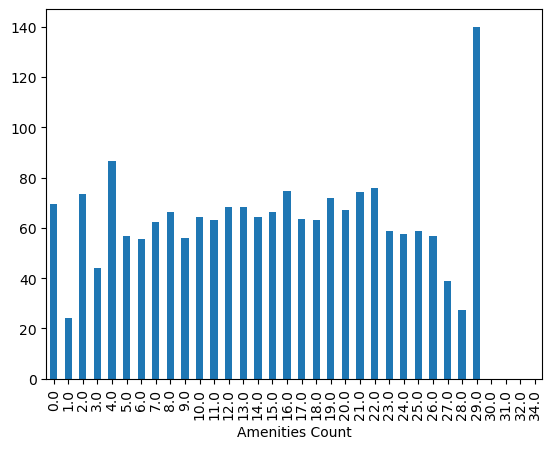

In [69]:
df.groupby('Amenities Count')['Price'].mean().plot.bar()

<AxesSubplot:xlabel='Amenities Count'>

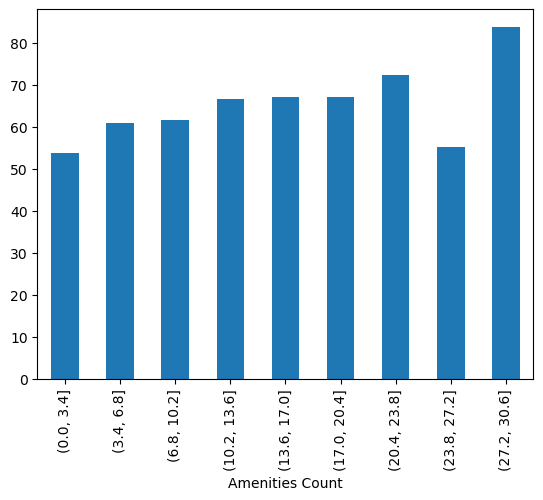

In [74]:
steps = 10
stept = df['Amenities Count'].max() / steps
steps = np.arange(0, df['Amenities Count'].max(), stept)
groups = pd.cut(df['Amenities Count'], steps)
df.groupby(groups)['Price'].mean().plot.bar()

# Maxs and function

In [ ]:
max_bathrooms = 3
max_bedrooms = 3
max_beds = 7

def format_max(max_value):
    return lambda value: str(value) if value < max_value else f'{max_value}+'

def calculate_ocupacy(reviews_month, min_nights, availability):
    return reviews_month * min_nights * 12 / availability

# Bathrooms

In [ ]:
format_max(max_bathrooms)(8)

In [ ]:
bathrooms = df['Bathrooms']
bathrooms = bathrooms.map(format_max(max_bathrooms))
df['Bathrooms'] = bathrooms

In [ ]:
df['Bathrooms'].value_counts().sort_index().plot()

# Bedrooms

In [ ]:
bedrooms = df['Bedrooms']
bedrooms = bedrooms.map(format_max(max_bedrooms))
df['Bedrooms'] = bedrooms

In [ ]:
df['Bedrooms'].value_counts().sort_index().plot()

# Beds

In [ ]:
beds = df['Beds']
beds = beds.map(format_max(max_beds))
df['Beds'] = beds

In [ ]:
df['Beds'].value_counts().sort_index().plot()

# https://medium.datadriveninvestor.com/airbnb-listings-analysis-in-toronto-october-2018-2a5358bae007
# Ocupacy

In [ ]:
reviews = df['Reviews per Month'].fillna(0)
nights = df['Minimum Nights'].fillna(0)
availability = df['Availability 365'].fillna(0).map(lambda value: value if value != 0 else 9999999)

df['Ocupacy'] = calculate_ocupacy(reviews, nights, availability)

steps = np.arange(0, 1.01, 0.1)
groups = pd.cut(df['Ocupacy'], steps)
df.groupby(groups).size().plot()

# Cleaning Fee

In [ ]:
df['Cleaning Fee'] = df['Cleaning Fee'].fillna(0)
df['Cleaning Fee'].value_counts()

steps = 50
stept = df['Cleaning Fee'].max() / steps
steps = np.arange(0, df['Cleaning Fee'].max(), stept)
groups = pd.cut(df['Cleaning Fee'], steps)
df.groupby(groups).size().plot()

In [ ]:
df.groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False).head(10).plot.bar()

In [ ]:
df.groupby('Neighbourhood')['Weekly Price'].mean().sort_values(ascending=False).head(10).plot.bar()

In [ ]:
df.groupby('Neighbourhood')['Monthly Price'].mean().sort_values(ascending=False).head(10).plot.bar()

In [ ]:
df.groupby('Neighbourhood')['Ocupacy'].mean().sort_values(ascending=False).head(20).plot.bar()

In [ ]:
df.groupby('Neighbourhood').size().sort_values(ascending=True).head(20).plot.bar()

In [ ]:
df.groupby(['Neighbourhood', 'Ocupacy']).apply(list)